In [44]:
# KNN from scratch without the use of scikit-learn library
# Data - Iris dataset 
# Classify iris plants into three species 

In [45]:
# Import libraries
import pandas as pd
import statistics as stat
import numpy as np
from datetime import datetime
from scipy import stats

import matplotlib.pyplot  as plt 

In [46]:
# Import dataset
iris_df = pd.read_csv(r'C:\Users\Yuliya.DESKTOP-FMS37R3\Documents\Data_Science\Projects\Machine Learning Models\datasets\iris.csv')

In [47]:
# Review dataset

def review_dataset(df):
    print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'The column names are: {list(df.columns)}')
    print(f'There are {df.isna().sum().sum()} missing values')
    print(f'There are {df.duplicated().sum()} duplicate rows')
    print(f'\nThe first 5 rows of dataset:')
    display(df.head(5))
    print(f'\nReview columns and data types')
    display(df.info())
    print('\nSummary statustics: ')
    display(df.describe())

In [48]:
review_dataset(iris_df)

The dataset has 150 rows and 5 columns
The column names are: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
There are 0 missing values
There are 3 duplicate rows

The first 5 rows of dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Review columns and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Summary statustics: 


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# Clean dataset and Encode lables 

# Remove duplicates 
iris_df.drop_duplicates(inplace = True, ignore_index=True)

In [50]:
# Encode target classes 
display(iris_df['species'].value_counts())


In [53]:
# Encode target classes 
#'Iris-versicolor' = 0
#'Iris-virginica' = 1
#'Iris-setosa' = 2

iris_df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'], [0, 1, 2], inplace=True)

In [54]:
# Split into train and test datasets 

def split_train_test_datasets(df, select_ratio):
    """Split dataset into train and test sets"""
    # Shuffle dataframe using sample function
    df = df.sample(frac=1, random_state=3)    # frac=1 returns entire dataframe
    # Select ratio
    ratio = select_ratio
    total_rows = df.shape[0]
    train_size = int(total_rows*ratio)
    # Split data into test and train
    train = df[0:train_size]
    test = df[train_size:]
    return train, test

In [55]:
def pairwise_dists(x_test, x_train):
    """ Computing pairwise distances using memory-efficient
        vectorization.

        Parameters
        ----------
        x_train : numpy.ndarray, shape=(M, D)
        x_test : numpy.ndarray, shape=(N, D)

        Returns
        -------
        numpy.ndarray, shape=(M, N)
            The Euclidean distance between each pair of
            rows between `x_train` and `x_test`."""
    dists = -2 * np.matmul(x_train, x_test.T)
    dists +=  np.sum(x_train**2, axis=1)[:, np.newaxis]
    dists += np.sum(x_test**2, axis=1)
    return  np.sqrt(dists)

In [56]:
def most_common(series): 
    return(stat.mode(series)) 

In [57]:
def predict_scores(arr_sorted_class_scores, klist):
    """ predict class score based on majority for each K """

    k_preds = np.empty((0,len(klist)), int)

    for row in arr_sorted_class_scores:

        row_prediction = []
        for k in klist:
            prediction = most_common(row[:k])
            row_prediction = np.append(row_prediction, int(prediction))

        k_preds = np.vstack((k_preds, np.array((row_prediction))))

    return k_preds

In [58]:
def calculate_accuracy (arr_preds, test_class_scores):
    """ calculate accuracy for each K """
    K_accuracies = []

    for row in arr_preds.T:
        matches = np.count_nonzero(row == test_class_scores)
        accuracy = (matches/len(row))*100
        K_accuracies = np.append(K_accuracies, accuracy)

    return K_accuracies

In [59]:
def KNN_Classify (x_train, y_train, x_test, y_test, klist):
    #== get Euclidian distance between train and test data points
    distance = pairwise_dists(x_train, x_test)

    #== sort disctance array ascending by row and return array of indexes
    sorted_distance_indexes = distance.argsort(axis=1)

    #== assign train class scores to sorted distance array by index 
    sortedarray = y_train[sorted_distance_indexes]

    #== predict class score based on majority for each K
    K_predictions = predict_scores(sortedarray, K_list)

    #== calucalate accuracy of predictions
    arr_K_Accuracy = calculate_accuracy(K_predictions, y_test)

    return arr_K_Accuracy, K_predictions


In [60]:
def print_accuracy_report(arr_k_accuracy, klist):

    Report = np.vstack((klist, arr_k_accuracy))
    Report = Report.T

    for row in Report:
        print(f"K-{int(row[0])}: {str(round(row[1], 2))}%")
    print(f"\n")


In [61]:
def print_prediction_rows(arr_pred, arr_test, num_rows, klist):
    
    df = pd.DataFrame(data=(arr_pred[:num_rows,:]), index=((arr_test.iloc[:, 0]).head(num_rows)), columns=klist)
    df.replace(to_replace = 0, value ="Iris-versicolor", inplace=True)
    df.replace(to_replace = 1, value ="Iris-virginica", inplace=True)
    df.replace(to_replace = 2, value ="Iris-setosa", inplace=True)

    print(f"K_predictions, z normalized, first {num_rows} rows:\n\n {df}")

In [62]:
def create_k_list(start, end, step=2):
    """Create a list of K values. 
    Input: Starting number (should be a odd number), ending number, step (default step = 2 for odd numbers)"""
    k_list_numbers = [i for i in range(start, end+1, step)]
    return k_list_numbers

In [80]:
#== List of K values to test
K_list = create_k_list(1, 61, step=2)

In [75]:
trainData, testData = split_train_test_datasets(iris_df, select_ratio = 0.8)

In [76]:
#== convert to numpy arrays and remove label rows and columns
x_trainArray = np.array(trainData.iloc[:,0:-1])     # train data
y_trainArray = np.array(trainData.iloc[:,-1])       # train iris type
x_testArray = np.array(testData.iloc[:,0:-1])       # test data
y_testArray = np.array(testData.iloc[:,-1])         # test iris type

In [81]:
#===> Q:a - Process data without normalizing features

#== calculate KNN accuracy for given K List
arr_K_Accuracy, arr_predictions = KNN_Classify(x_trainArray, y_trainArray, x_testArray, y_testArray, K_list)

#== print accuracy report
print(f"\nKNN accuracy report without normalizing features:\n")
print_accuracy_report(arr_K_Accuracy, K_list)


KNN accuracy report without normalizing features:

K-1: 90.0%
K-3: 93.33%
K-5: 93.33%
K-7: 93.33%
K-9: 93.33%
K-11: 93.33%
K-13: 93.33%
K-15: 93.33%
K-17: 93.33%
K-19: 93.33%
K-21: 90.0%
K-23: 90.0%
K-25: 90.0%
K-27: 90.0%
K-29: 90.0%
K-31: 90.0%
K-33: 90.0%
K-35: 90.0%
K-37: 93.33%
K-39: 93.33%
K-41: 90.0%
K-43: 90.0%
K-45: 86.67%
K-47: 90.0%
K-49: 90.0%
K-51: 86.67%
K-53: 83.33%
K-55: 83.33%
K-57: 86.67%
K-59: 90.0%
K-61: 86.67%




In [82]:
#===> Q:b - Process data with z normalized features

#== Z-Normailze data sets
x_train_norm = stats.zscore(x_trainArray)
x_test_norm = stats.zscore(x_testArray)

#== calculate KNN accuracy for given K List
arr_K_Accuracy, arr_predictions = KNN_Classify (x_train_norm, y_trainArray, x_test_norm, y_testArray, K_list)

#== print accuracy report
print(f"KNN accuracy report with z normalized features:\n")
print_accuracy_report(arr_K_Accuracy, K_list)


KNN accuracy report with z normalized features:

K-1: 90.0%
K-3: 90.0%
K-5: 86.67%
K-7: 90.0%
K-9: 86.67%
K-11: 86.67%
K-13: 86.67%
K-15: 86.67%
K-17: 86.67%
K-19: 86.67%
K-21: 86.67%
K-23: 86.67%
K-25: 90.0%
K-27: 86.67%
K-29: 86.67%
K-31: 86.67%
K-33: 86.67%
K-35: 86.67%
K-37: 86.67%
K-39: 83.33%
K-41: 83.33%
K-43: 83.33%
K-45: 83.33%
K-47: 83.33%
K-49: 83.33%
K-51: 83.33%
K-53: 83.33%
K-55: 83.33%
K-57: 83.33%
K-59: 83.33%
K-61: 83.33%




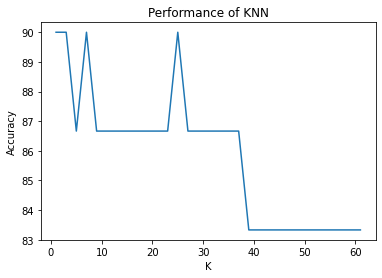

In [83]:
# Visualize K and Accuracy 

fig, ax = plt.subplots()
ax.plot(K_list, arr_K_Accuracy)
ax.set(xlabel="K",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()